In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../datasets/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [3]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [16]:
df.drop('Unnamed: 0',inplace=True,axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [21]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Which role has the highest salary employment wise?**

In [151]:
new_df=df.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False).head(5)
new_df

job_title
Data Scientist               13433726
Data Engineer                13279754
Data Analyst                  7387347
Machine Learning Engineer     3945440
Data Architect                1956613
Name: salary_in_usd, dtype: int64

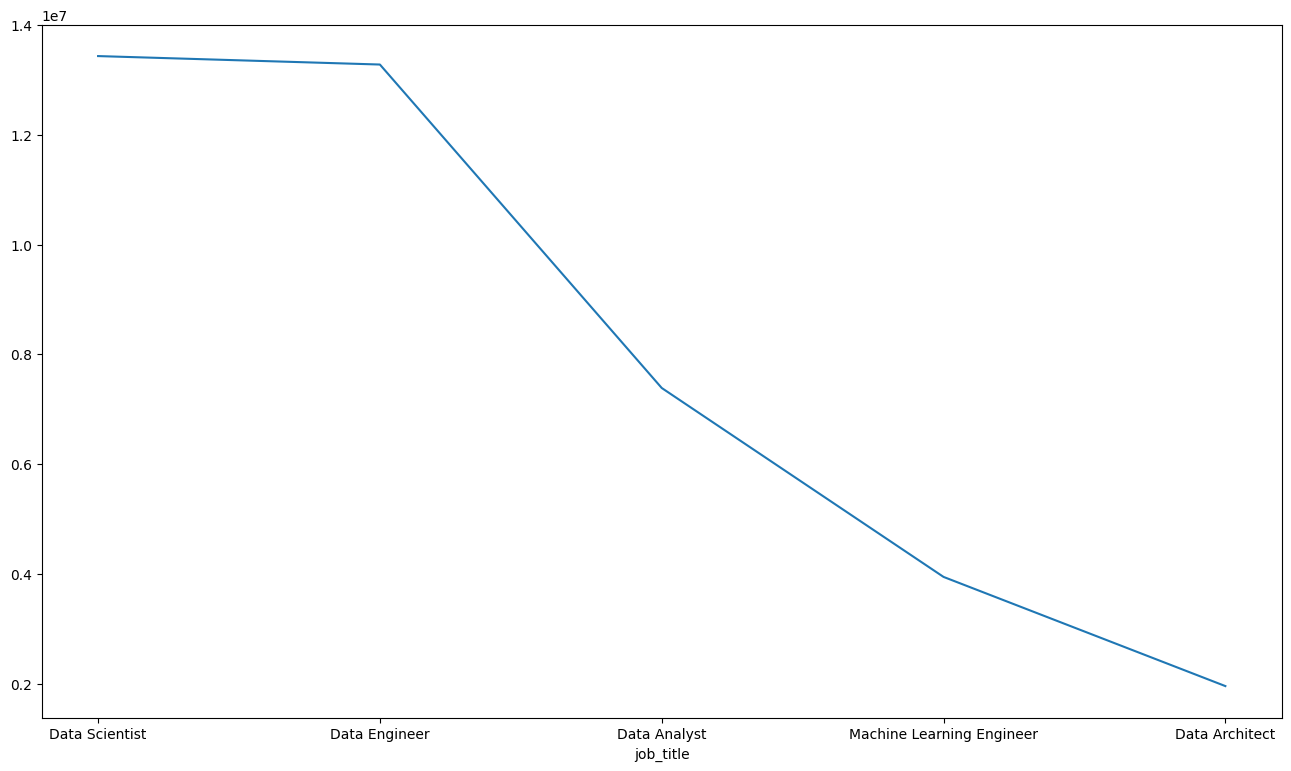

In [152]:
plt.figure(figsize=(16,9))
sns.lineplot(data=new_df,x=new_df.index,y=new_df.values)
plt.show()

**Which employment types do employers prefer to hire?**

In [42]:
new_df=df.employment_type.value_counts()
new_df

employment_type
FT    546
PT     10
CT      5
FL      4
Name: count, dtype: int64

**Which role are entry leveled generally hired for?**

In [69]:
df[df.experience_level=='EN'].job_title.value_counts().head()

job_title
Data Scientist               22
Data Analyst                 12
Data Engineer                12
Machine Learning Engineer     9
Data Science Consultant       5
Name: count, dtype: int64

**Which countries pay the highest for which roles?**

In [85]:
df.groupby(['company_location','job_title'])['salary_in_usd'].sum().sort_values(ascending=False)

company_location  job_title                    
US                Data Engineer                    10355178
                  Data Scientist                   10075317
                  Data Analyst                      6212885
                  Machine Learning Engineer         2350246
                  Data Architect                    1673513
                                                     ...   
IN                Data Science Consultant              5707
                  3D Computer Vision Researcher        5409
IR                Data Engineer                        4000
VN                Data Scientist                       4000
MX                Data Scientist                       2859
Name: salary_in_usd, Length: 179, dtype: int64

**What insights can you find regarding employee demographics?**

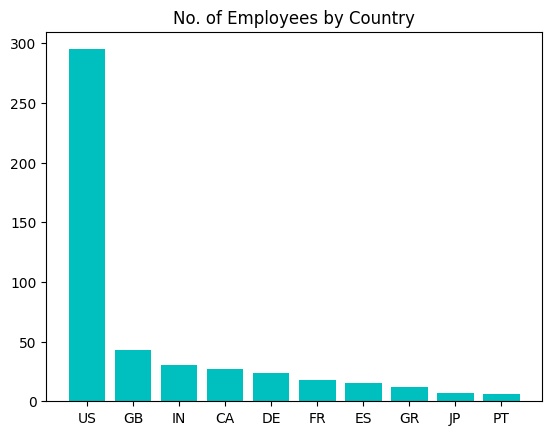

In [184]:
new_df=df.employee_residence.value_counts().head(10)
#new_df.index
plt.bar(new_df.index,new_df.values,color='c')
plt.title('No. of Employees by Country')
plt.show()

**Which experience level has the highest hiring?**

In [97]:
new_df=df.experience_level.value_counts()
new_df

experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64

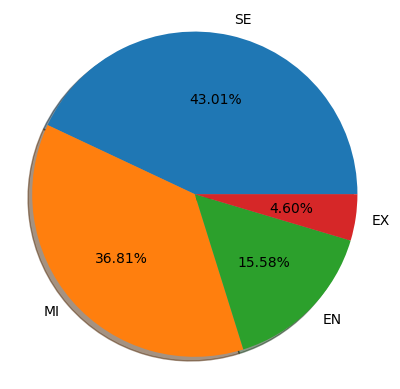

In [106]:
plt.pie(new_df.values,labels=new_df.index,autopct='%0.2f%%',radius=1.1,shadow = True)
plt.show()

**Does company size affect the rate of hiring and pay scale?**

In [111]:
df.groupby('company_size').agg({'company_size':'count','salary_in_usd':'sum'})

,company_size,salary_in_usd
company_size,,
L,193,22815279
M,290,33294053
S,82,6385512


**What is the year over year (YoY) salary growth at different levels?**

In [113]:
df.loc[:,'work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

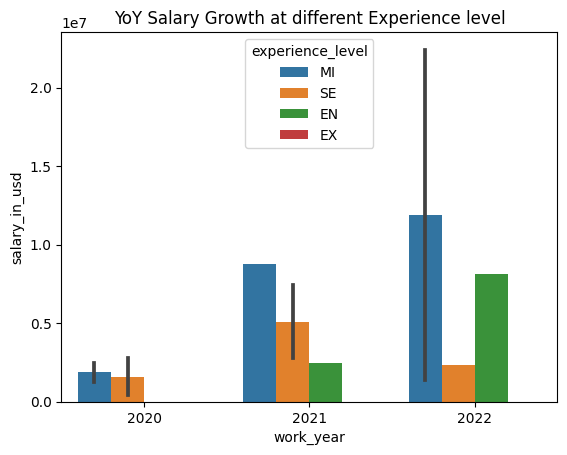

In [181]:
new_df=df.groupby(['work_year','experience_level'],as_index=False)['salary_in_usd'].sum()
sns.barplot(x=new_df.work_year,y=new_df.salary_in_usd,hue=df.experience_level)
plt.title('YoY Salary Growth at different Experience level')
plt.show()